# GUI class

In [111]:
import matplotlib
matplotlib.use('Agg')
import tkinter as tk
from tkinter import ttk
import pandas as pd
import tkinter.font as tkFont
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
matplotlib.use('Agg')
import pickle
from PIL import Image, ImageTk

with open('city_area_road.pkl', 'rb') as f:
    data1 = {"縣市": ''}
    data2 = pickle.load(f)
    data2['南海島'] = {'南海島':'南海島'}
    data = {}
    data.update(data1)
    data.update(data2)

selected_list = [[], [], []]


class Design(tk.Frame):
    def __int__(self):
        tk.Frame.__int__(self)
        self.grid()

    def Drop_down_list(self, title, title_row):
        self.title_row = title_row
        labelTop = tk.Label(cal, text = title)
        labelTop.grid(column = 0, row = title_row)
        self.City = ttk.Combobox(cal, values = list(data.keys()))
        self.City.grid(column = 1, row = title_row)
        self.City.current(0)
        self.Region = ttk.Combobox(cal, values = ["鄉鎮區"])
        self.Region.grid(column = 2, row = title_row)
        self.Region.current(0)
        self.City.bind("<<ComboboxSelected>>", self.Chosen)

    def Chosen(self, city):
        self.var_Selected = self.City.get()
        self.Region = ttk.Combobox(cal, values = list(data[self.var_Selected].keys()))
        self.Region.grid(column = 2, row = self.title_row)
        self.Region.current(0)
        self.Region.bind("<<ComboboxSelected>>", self.Saved)

    def Saved(self, event):
        selected_city = self.City.get()
        selected_region = self.Region.get()
        if selected_list[self.title_row] == []:
            selected_list[self.title_row] = [selected_city, selected_region]
        else:
            selected_list[self.title_row][0] = selected_city
            selected_list[self.title_row][1] = selected_region
         
    def update_scrollregion(self, event):
        self.Canvas.configure(scrollregion=self.Canvas.bbox("all"))

    def Search(self):
        print(selected_list)
        plt.clf()
        pic = draw(selected_list)
        f1 = tkFont.Font(family='microsoft yahei', size=25, weight='bold')
        f2 = tkFont.Font(family='microsoft yahei', size=15, weight='bold')
        f3 = tkFont.Font(family='microsoft yahei', size=40, weight='bold')
        
        
        if (selected_list[0][0] == '釣魚臺') or (selected_list[1][0] == '釣魚臺') or (selected_list[2][0] == '釣魚臺'):
            # 建立Frame、Canvas及Canvasframe
            self.Frame = tk.Frame(cal, width=1425, height=700, bg="white")
            self.Frame.grid(row=3, column=0, columnspan = 2000, sticky="nsew")
            self.Frame.rowconfigure(0, weight=1) 
            self.Frame.columnconfigure(0, weight=1)
        
            self.Canvas = tk.Canvas(self.Frame, width=1425, height=500, bg="white")
            self.Canvas.grid(row=3, column=0, columnspan = 2000, sticky="nsew")
        
            self.CanvasFrame = tk.Frame(self.Canvas, width=1425, height=700, bg="white")
            #self.Canvas.create_window(0, 0, window=self.CanvasFrame, anchor='nw')
            
            self.easter_egg1 =img = ImageTk.PhotoImage(Image.open('easter_egg1-1.gif').resize((1412, 476),Image.ANTIALIAS)) 
            self.image = self.Canvas.create_image(10,10,anchor = 'nw',image = self.easter_egg1)
            self.Canvas.pack()
            


        elif(selected_list[0][0] == '南海島') or (selected_list[1][0] == '南海島') or (selected_list[2][0] == '南海島'):
            self.Frame = tk.Frame(cal, width=1425, height=700, bg="blue")
            self.Frame.grid(row=3, column=0, columnspan = 2000, sticky="nsew")
            self.Frame.rowconfigure(0, weight=1) 
            self.Frame.columnconfigure(0, weight=1)
        
            self.Canvas = tk.Canvas(self.Frame, width=1425, height=700, bg="lightcyan")
            self.Canvas.grid(row=3, column=0, columnspan = 2000, sticky="nsew")
        
            self.CanvasFrame = tk.Frame(self.Canvas, width=1425, height=700, bg="white")
            self.Canvas.create_window(0, 0, window=self.CanvasFrame, anchor='nw')
            self.bus_label = tk.Label(self.CanvasFrame, text='南海島在哪裡？', font = f1, bg = "lightcyan")
            self.bus_label.grid(column = 1, row = 3, columnspan = 3, sticky="nsew")
            
            
            self.easter_egg2 =img = ImageTk.PhotoImage(Image.open('easter_egg2-1.gif').resize((400, 400),Image.ANTIALIAS)) 
            self.image = self.Canvas.create_image(10,40,anchor = 'nw',image = self.easter_egg2)
            self.easter_egg3 =img = ImageTk.PhotoImage(Image.open('easter_egg2-2.gif').resize((400, 400),Image.ANTIALIAS)) 
            self.image = self.Canvas.create_image(410,40,anchor = 'nw',image = self.easter_egg3)
            self.easter_egg4 =img = ImageTk.PhotoImage(Image.open('easter_egg2-3.gif').resize((400, 400),Image.ANTIALIAS)) 
            self.image = self.Canvas.create_image(810,40,anchor = 'nw',image = self.easter_egg4)
            
            self.Canvas.pack()
            
            
            
            
            
        else:
            # 建立Frame、Canvas及Canvasframe
            self.Frame = tk.Frame(cal, width=1425, height=700, bg="white")
            self.Frame.grid(row=3, column=0, columnspan = 2000, sticky="nsew")
            self.Frame.rowconfigure(0, weight=1) 
            self.Frame.columnconfigure(0, weight=1)
        
            self.Canvas = tk.Canvas(self.Frame, width=1425, height=700, bg="white")
            self.Canvas.grid(row=3, column=0, columnspan = 2000, sticky="nsew")
        
            self.CanvasFrame = tk.Frame(self.Canvas, width=1425, height=700, bg="white")
            self.Canvas.create_window(0, 0, window=self.CanvasFrame, anchor='nw')

            # 最上方數字呈現
            self.bus_label = tk.Label(self.CanvasFrame, text='公車站牌密度(個/平方公里)', font = f1, bg = "white")
            self.bus_label.grid(column = 1, row = 3, columnspan = 3, sticky="nsew")
        
            self.bus_label_Region1 = tk.Label(self.CanvasFrame, text=selected_list[0][1], font = f2, bg = "white")
            self.bus_label_Region1.grid(column = 1, row = 4, sticky="nsew")
            self.bus_label_Region2 = tk.Label(self.CanvasFrame, text=selected_list[1][1], font = f2, bg = "white")
            self.bus_label_Region2.grid(column = 2, row = 4, sticky="nsew")
            self.bus_label_Region3 = tk.Label(self.CanvasFrame, text=selected_list[2][1], font = f2, bg = "white")
            self.bus_label_Region3.grid(column = 3, row = 4, sticky="nsew")
        
            self.bus_number_Region1 = tk.Label(self.CanvasFrame, text=str(round(pic.transport_density()[0][0],1)), font = f3, bg = "white")
            self.bus_number_Region1.grid(column = 1, row = 5, sticky="nsew")
            self.bus_number_Region2 = tk.Label(self.CanvasFrame, text=str(round(pic.transport_density()[1][0],1)), font = f3, bg = "white")
            self.bus_number_Region2.grid(column = 2, row = 5, sticky="nsew")
            self.bus_number_Region3 = tk.Label(self.CanvasFrame, text=str(round(pic.transport_density()[2][0],1)), font = f3, bg = "white")
            self.bus_number_Region3.grid(column = 3, row = 5, sticky="nsew")
        
            self.clinic_label = tk.Label(self.CanvasFrame, text='人均診所家數(千分之一)', font = f1, bg = "white")
            self.clinic_label.grid(column = 5, row = 3, columnspan = 3, sticky="nsew")
        
            self.clinic_label_Region1 = tk.Label(self.CanvasFrame, text=selected_list[0][1], font = f2, bg = "white")
            self.clinic_label_Region1.grid(column = 5, row = 4, sticky="nsew")
            self.clinic_label_Region2 = tk.Label(self.CanvasFrame, text=selected_list[1][1], font = f2, bg = "white")
            self.clinic_label_Region2.grid(column = 6, row = 4, sticky="nsew")
            self.clinic_label_Region3 = tk.Label(self.CanvasFrame, text=selected_list[2][1], font = f2, bg = "white")
            self.clinic_label_Region3.grid(column = 7, row = 4, sticky="nsew")

            self.clinic_number_Region1 = tk.Label(self.CanvasFrame, text=str(round(pic.clinic_density()[0][0],1)), font = f3, bg = "white")
            self.clinic_number_Region1.grid(column = 5, row = 5, sticky="nsew")
            self.clinic_number_Region2 = tk.Label(self.CanvasFrame, text=str(round(pic.clinic_density()[1][0],1)), font = f3, bg = "white")
            self.clinic_number_Region2.grid(column = 6, row = 5, sticky="nsew")
            self.clinic_number_Region3 = tk.Label(self.CanvasFrame, text=str(round(pic.clinic_density()[2][0],1)), font = f3, bg = "white")
            self.clinic_number_Region3.grid(column = 7, row = 5, sticky="nsew")
        
        # 畫圖
            one = FigureCanvasTkAgg(pic.income_pic(), self.CanvasFrame)
            one.get_tk_widget().grid(column = 1, row = 7, columnspan = 3)
        
            two = FigureCanvasTkAgg(pic.clinic_pic(), self.CanvasFrame)
            two.get_tk_widget().grid(column = 5, row = 7, columnspan = 3)
        
            three = FigureCanvasTkAgg(pic.entertainment_pic(), self.CanvasFrame) 
            three.get_tk_widget().grid(column = 1, row = 9, columnspan = 3)
    
            four = FigureCanvasTkAgg(pic.crime_pic(), self.CanvasFrame)
            four.get_tk_widget().grid(column = 5, row = 9, columnspan = 3)

            five = FigureCanvasTkAgg(pic.school_pic(), self.CanvasFrame)
            five.get_tk_widget().grid(column = 1, row = 11, columnspan = 3)
        
            six = FigureCanvasTkAgg(pic.air_pic(), self.CanvasFrame)
            six.get_tk_widget().grid(column = 5, row = 11, columnspan = 3)
    
        # 建立下拉捲軸
            lb = Listbox(self.Frame)
            self.Scroll = tk.Scrollbar(self.Frame, orient=tk.VERTICAL)
            self.Scroll.config(command=self.Canvas.yview)
            self.Canvas.config(yscrollcommand=self.Scroll.set)
            lb['yscrollcommand'] = self.Scroll.set
            for i in range(100):
                lb.insert(END,str(i))
            self.Scroll.grid(row=3, column=1, sticky="ns")
            self.CanvasFrame.bind("<Configure>", self.update_scrollregion)
           




# 繪圖 class

In [132]:
myfont = FontProperties(fname=r'/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/Microsoft-YaHei.ttf')

class draw():
    
    def __init__(self,lists):
        self.cities = [lists[0][0], lists[1][0],lists[2][0]]          # 處理傳入的lists
        self.regions = [lists[0][1],lists[1][1],lists[2][1]]

        self.income_data =  pd.read_csv('平均家庭收入.csv')    
        self.clinic_data = pd.read_csv('醫療資源.csv')
        self.entertainment_data = pd.read_csv('娛樂.csv')
        self.market_data = pd.read_csv('超市家數.csv')
        self.crime_data = pd.read_csv('犯罪率.csv')
        self.school_data = pd.read_csv('學校數量.csv')
        self.air_data = pd.read_csv('air_pollution.csv')
        self.transport_data = pd.read_csv('公車站牌密度.csv')
        self.title_size = 25
        self.ticks_size = 13
        self.color_set = ['navy','cornflowerblue','lightsteelblue']

        
    
    def transport_density(self):
        no1 =  self.transport_data[( self.transport_data.loc[:,'地區名'] ==  self.regions[0]) & ( self.transport_data.loc[:,'縣市名'] == self.cities[0])]['公車站牌密度(站/平方公里)']
        y1 = no1.values.flatten()
        no2 = self.transport_data[( self.transport_data.loc[:,'地區名'] ==  self.regions[1]) & ( self.transport_data.loc[:,'縣市名'] == self.cities[1])]['公車站牌密度(站/平方公里)']
        y2 = no2 .values.flatten()
        no3 = self.transport_data[( self.transport_data.loc[:,'地區名'] ==  self.regions[2]) & ( self.transport_data.loc[:,'縣市名'] == self.cities[2])]['公車站牌密度(站/平方公里)']
        y3 = no3.values.flatten()

        return [y1, y2, y3]
    
    
    def clinic_density(self):
        no1 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[0]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[0])]['人均院所家數(家數/千人)']
        y1 = no1.values.flatten()
        no2 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[1]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[1])]['人均院所家數(家數/千人)']
        y2 = no2 .values.flatten()
        no3 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[2]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[2])]['人均院所家數(家數/千人)']
        y3 = no3.values.flatten()
        
        return [y1, y2, y3]
        
       
    def income_pic (self):
        city_list = list(set(self.cities)) + ['臺灣地區']
        F = plt.figure(figsize = (7.1,7.1), dpi = 100)
        x = self.income_data['年份']
        for city in city_list:
            y = self.income_data[city]/(10**6)
            plt.plot(x,y, marker = 'o',label = city)
        plt.title('年收入', fontproperties = myfont, fontsize = self.title_size)
        plt.xticks(fontsize = self.ticks_size)
        plt.yticks(fontsize = self.ticks_size)
        plt.ylabel('單位：百萬元', fontsize = self.ticks_size)
        plt.legend()
        return F


    def clinic_pic(self):
        clinic = ['診所家數', '大醫院家數'] 
        F = plt.figure(figsize=(7.1,7.1), dpi=100)
        no1 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[0]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[0])]['診所家數']
        x_all = list(range(0, 1))
        y1 = no1.values.flatten()
        no2 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[1]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[1])]['診所家數']
        y2 = no2 .values.flatten()
        no3 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[2]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[2])]['診所家數']
        y3 = no3.values.flatten()

        width = 0.25   #先設定每個長條的寬度
        plt.barh([i-width for i in x_all], y1, height=width, label= (self.cities[0]+self.regions[0]), color = self.color_set[0] ) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.barh([i for i in x_all], y2, height=width, label=(self.cities[1]+self.regions[1]),color = self.color_set[1])        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.barh([i+width for i in x_all], y3, height=width, label=(self.cities[2]+self.regions[2]), color = self.color_set[2])
        
                     
        plt.twiny()
        no1 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[0]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[0])]['大醫院家數']
        x_all = list(range(1, 2))
        y1 = no1.values.flatten()
        no2 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[1]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[1])]['大醫院家數']
        y2 = no2 .values.flatten()
        no3 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[2]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[2])]['大醫院家數']
        y3 = no3.values.flatten()
                     
        width = 0.25   #先設定每個長條的寬度
        plt.barh([i-width for i in x_all], y1, height=width, label= (self.cities[0]+self.regions[0]),color = self.color_set[0]) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.barh([i for i in x_all], y2, height=width, label=(self.cities[1]+self.regions[1]),color = self.color_set[1])        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.barh([i+width for i in x_all], y3, height=width, label=(self.cities[2]+self.regions[2]),color = self.color_set[2])
        plt.xlim((0,8))
        
        plt.yticks([0,1],clinic, rotation = 45, fontsize = self.ticks_size)
        plt.xticks(fontsize = self.ticks_size)
        plt.legend()
        plt.title('醫院診所',fontsize = self.title_size)
        return F


    def entertainment_pic (self):      
        entertainment = ['電影院', '百貨','全聯','頂好','好市多'] 
        F = plt.figure(figsize=(7.1,7.1), dpi=100)
        x_all = list(range(0, len(entertainment)))
        no1 = self.entertainment_data[(self.entertainment_data.loc[:,'地區名'] == self.regions[0]) & (self.entertainment_data.loc[:,'縣市名'] == self.cities[0])][entertainment]
        y1 = no1.values.flatten()
        no2 = self.entertainment_data[(self.entertainment_data.loc[:,'地區名'] == self.regions[1]) & (self.entertainment_data.loc[:,'縣市名'] == self.cities[1])][entertainment]
        y2 = no2 .values.flatten()
        no3 = self.entertainment_data[(self.entertainment_data.loc[:,'地區名'] == self.regions[2]) & (self.entertainment_data.loc[:,'縣市名'] == self.cities[2])][entertainment]
        y3 = no3.values.flatten()
        
        width = 0.25   #先設定每個長條的寬度
        plt.bar([i-width for i in x_all], y1, width=width, label= (self.cities[0]+self.regions[0]),color = self.color_set[0]) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.bar([i for i in x_all], y2, width=width, label=(self.cities[1]+self.regions[1]),color = self.color_set[1])        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.bar([i+width for i in x_all], y3, width=width, label=(self.cities[2]+self.regions[2]),color = self.color_set[2])
        plt.xticks(x_all,entertainment, fontsize = self.ticks_size)
        plt.yticks(fontsize = self.ticks_size)
        plt.ylabel('單位：間', fontsize = self.ticks_size)
        plt.legend()
        plt.title('百貨&電影院&超市數目', fontsize = self.title_size)
        return F
        

    def crime_pic (self):
        crime = ['竊盜犯罪率','強制性交犯罪率','強盜犯罪率','搶奪犯罪率']
        ticks_name = ['竊盜','強制性交','強盜','搶奪']
        F = plt.figure(figsize=(7.1,7.1), dpi=100)
        x_all = list(range(0, len(crime )))
        no1 = self.crime_data[(self.crime_data.loc[:,'地區名'] == self.regions[0]) & (self.crime_data.loc[:,'縣市名'] == self.cities[0])][crime]
        y1 = no1.values.flatten()
        no2 = self.crime_data[(self.crime_data.loc[:,'地區名'] == self.regions[1]) & (self.crime_data.loc[:,'縣市名'] == self.cities[1])][crime]
        y2 = no2 .values.flatten()
        no3 = self.crime_data[(self.crime_data.loc[:,'地區名'] == self.regions[2]) & (self.crime_data.loc[:,'縣市名'] == self.cities[2])][crime]
        y3 = no3.values.flatten()
        
        width = 0.25   #先設定每個長條的寬度
        plt.bar([i-width for i in x_all], y1, width=width, label= (self.cities[0]+self.regions[0]),color = self.color_set[0]) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.bar([i for i in x_all], y2, width=width, label=(self.cities[1]+self.regions[1]),color = self.color_set[1])        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.bar([i+width for i in x_all], y3, width=width, label=(self.cities[2]+self.regions[2]),color = self.color_set[2])
        plt.xticks(x_all,ticks_name, fontsize = self.ticks_size)
        plt.yticks(fontsize = self.ticks_size)
        plt.ylabel('單位：件/十萬人', fontsize = self.ticks_size)
        plt.legend()
        plt.title('犯罪率（三年加總）', fontsize = self.title_size)
        return F
        

    def school_pic (self):
        school =['幼稚園數量', '國小數量', '國中數量', '高中數量', '大學數量']
        F = plt.figure(figsize=(7.1,7.1), dpi=100)
        x_all = list(range(0, len(school)))
        no1 = self.school_data[(self.school_data.loc[:,'地區名'] == self.regions[0]) & (self.school_data.loc[:,'縣市名'] == self.cities[0])][school]
        y1 = no1.values.flatten()
        no2 = self.school_data[(self.school_data.loc[:,'地區名'] == self.regions[1]) & (self.school_data.loc[:,'縣市名'] == self.cities[1])][school]
        y2 = no2 .values.flatten()
        no3 = self.school_data[(self.school_data.loc[:,'地區名'] == self.regions[2]) & (self.school_data.loc[:,'縣市名'] == self.cities[2])][school]
        y3 = no3.values.flatten()
        
        width = 0.25   #先設定每個長條的寬度
        plt.bar([i-width for i in x_all], y1, width=width, label= (self.cities[0]+self.regions[0]),color = self.color_set[0]) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.bar([i for i in x_all], y2, width=width, label=(self.cities[1]+self.regions[1]),color = self.color_set[1])        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.bar([i+width for i in x_all], y3, width=width, label=(self.cities[2]+self.regions[2]),color = self.color_set[2])
        plt.xticks(x_all,school, fontsize = self.ticks_size)
        plt.yticks(fontsize = self.ticks_size, fontproperties = myfont)
        plt.ylabel('單位：間', fontsize = self.ticks_size)
        plt.legend()
        plt.title('各級學校數目', fontsize = self.title_size)
        return F
       

    def air_pic (self):
        F = plt.figure(figsize=(7.1,7.1), dpi=100)
        no1 = self.air_data[(self.air_data.loc[:,'地區名'] == self.regions[0]) & (self.air_data.loc[:,'縣市名'] == self.cities[0])]['PM 2.5']
        x1 = list(range(0, 11))
        y1 = no1.values.flatten()
        no2 = self.air_data[(self.air_data.loc[:,'地區名'] == self.regions[1]) & (self.air_data.loc[:,'縣市名'] == self.cities[1])]['PM 2.5']
        y2 = no2 .values.flatten()
        no3 = self.air_data[(self.air_data.loc[:,'地區名'] == self.regions[2]) & (self.air_data.loc[:,'縣市名'] == self.cities[2])]['PM 2.5']
        y3 = no3.values.flatten()
        
        plt.plot(x1,y1, marker = 'o', label = self.cities[0] + self.regions[0],color = self.color_set[0])
        plt.plot(x1,y2, marker = 'o', label = self.cities[1] + self.regions[1],color = self.color_set[1])
        plt.plot(x1,y3, marker = 'o', label = self.cities[2] + self.regions[2],color = self.color_set[2])
        date = [('2019/'+str(x)) for x in range(1,12)]
        plt.xticks(x1,date, rotation = 45, fontsize = self.ticks_size)
        plt.yticks(fontsize = self.ticks_size)
        plt.title('空氣品質', fontsize = self.title_size)
        plt.ylabel('單位：μg/m3', fontsize = self.ticks_size)
        plt.legend()
        return F



# 主程式區

In [ ]:
# GUI頁面建立
cal = tk.Tk()
cal.title("南波灣住區生活品質檢測")
cal.geometry('1050x700')

# 下拉式選單建立
Design().Drop_down_list("所選地區  : ", 0)
Design().Drop_down_list("比較地區1 : ", 1)
Design().Drop_down_list("比較地區2 : ", 2)

# 搜尋按鈕建立
button = tk.Button(cal, text = "搜尋", bg = "lightblue", command = Design().Search)
button.grid(column = 3, row = 0, rowspan = 3)

cal.mainloop()

[['基隆市', '中山區'], ['宜蘭縣', '羅東鎮'], ['連江縣', '東引鄉']]
[['基隆市', '中山區'], ['新北市', '板橋區'], ['臺北市', '大同區']]


In [48]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [163]:
import matplotlib 
matplotlib.matplotlib_fname()

'/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


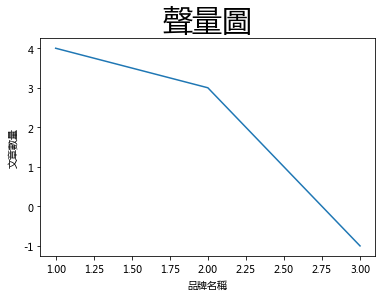

In [49]:
from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt
#myfont = FontProperties(fname=r'/Users/lanjingyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/Microsoft-YaHei.ttf')
plt.rcParams['font.sans-serif'] = ['Microsoft-YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot((1,2,3),(4,3,-1))
plt.title("聲量圖", fontproperties = myfont, fontsize = 30)
plt.ylabel("文章數量")
plt.xlabel("品牌名稱") 
plt.show()

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft-YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [69]:
from PIL import Image, ImageTk

In [47]:
from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式


In [97]:
import tkinter as tk
from random import randrange

class Example(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)

        self.DrawArea = tk.Canvas(self, width=1000, height=600, background="black",
                                  borderwidth=0, highlightthickness=0)
        self.scale = tk.Canvas(self, width=30, height=600, background="black",
                               borderwidth=0, highlightthickness=0)
        self.hsb = tk.Scrollbar(self, orient="horizontal", command=self.DrawArea.xview)
        self.vsb = tk.Scrollbar(self, orient="vertical", command=self.DrawArea.yview)
        self.DrawArea.configure(yscrollcommand=self.vsb.set, xscrollcommand=self.hsb.set)

        self.DrawArea.grid(row=0, column=0, sticky="nsew")
        self.scale.grid(row=0, column=1, sticky="nsew")
        self.vsb.grid(row=0, column=2, sticky="ns")
        self.hsb.grid(row=1, column=0, columnspan=2,sticky="ew")
        self.grid_rowconfigure(0, weight=1)
        self.grid_columnconfigure(0, weight=1)

        self.draw_scale()
        self.draw_points()

    def draw_scale(self):
        value = 5.0
        for y in range(25, 600, 25):
            self.scale.create_text((25, y), text=str(value), fill="white", anchor="ne")
            value -= 0.5

    def draw_points(self):
        import math
        for x in range(5,10000):
            y = randrange(600)
            color = "green" if (300 > y > 200) else "red"
            self.DrawArea.create_rectangle(x-2,y-2,x+2,y+2, fill = color)
        self.DrawArea.configure(scrollregion = self.DrawArea.bbox("all"))

root = tk.Tk()
Example(root).pack(fill="both", expand=True)
root.mainloop()

In [101]:
from tkinter import * 

def _select(y): 
    row = lb.nearest(y) 
    lb.selection_clear(0, END) 
    lb.selection_set(row) 

def _b2motion(x, y): 
    lb.scan_dragto(x, y) 
    _select(y) 
    return 'break' 


root = Tk() 

sb = Scrollbar(root) 
lb =Listbox(root, width=20,yscrollcommand=sb.set) 

lb.bind('<B3-Motion>', lambda e: _b2motion(e.x, e.y)) 
sb.config(command=lb.yview) 

lb.grid(row=0,column=0) 
sb.grid(row=0,column=1,sticky=N+S) 


for x in range(50): 
    lb.insert(END, x) 

mainloop() 